In [1]:
# import modules%pylab inline
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import librosa
import numpy as np
import pandas as pd
from librosa import display

In [2]:
x, sr = librosa.load('GOOGLstock.wav')
print x.shape, sr

(42965,) 22050


In [3]:
ipd.Audio(x, rate=sr)

In [4]:
hop_length = 512
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length)
print onset_frames # frame numbers of estimated onsets

[ 4 12 15 22 31 33 38 46 53 59 62 65 76 81]


In [5]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)
print onset_times

[0.09287982 0.27863946 0.34829932 0.510839   0.71981859 0.7662585
 0.88235828 1.06811791 1.2306576  1.36997732 1.43963719 1.50929705
 1.76471655 1.88081633]


In [6]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)
print onset_samples

[ 2048  6144  7680 11264 15872 16896 19456 23552 27136 30208 31744 33280
 38912 41472]


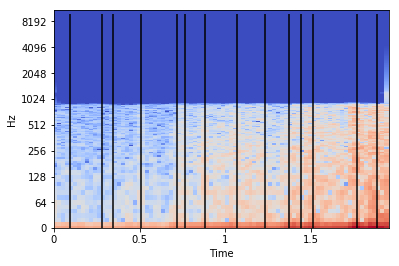

In [7]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [8]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = numpy.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(numpy.diff(onset_samples))   # every segment has uniform frame size
    return numpy.concatenate([
        numpy.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [9]:

concatenated_signal = concatenate_segments(x, onset_samples, 0.500)

In [10]:
ipd.Audio(concatenated_signal, rate=sr)

In [11]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length, backtrack=True)

In [12]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

In [13]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

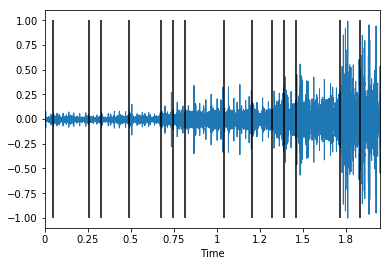

In [14]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

In [15]:
data = pd.read_csv('daily_adjusted_GOOGL.csv')

In [16]:
data

,timestamp,open,high,low,close,volume
0,2019-05-03,1177.410,1191.40,1173.55,1189.550,2079376
1,2019-05-02,1172.600,1179.38,1158.33,1166.510,2254890
2,2019-05-01,1197.500,1199.25,1171.67,1173.320,3717018
3,2019-04-30,1190.630,1200.98,1183.00,1198.960,6658855
4,2019-04-29,1280.510,1296.97,1271.71,1296.200,3618362
5,2019-04-26,1273.380,1278.91,1265.00,1277.420,1361419
6,2019-04-25,1270.300,1272.80,1258.00,1267.340,1567161
7,2019-04-24,1270.590,1274.00,1259.81,1260.050,1169797
8,2019-04-23,1256.640,1274.43,1251.97,1270.590,1593449
9,2019-04-22,1236.670,1254.34,1233.37,1253.760,954419


In [17]:
close = data["close"]

In [18]:
close

0       1189.550
1       1166.510
2       1173.320
3       1198.960
4       1296.200
5       1277.420
6       1267.340
7       1260.050
8       1270.590
9       1253.760
10      1241.470
11      1240.140
12      1231.910
13      1226.530
14      1222.730
15      1209.590
16      1206.450
17      1202.690
18      1208.280
19      1211.450
20      1219.450
21      1210.810
22      1205.540
23      1198.980
24      1176.890
25      1172.270
26      1178.010
27      1189.840
28      1197.380
29      1207.650
          ...   
3672     129.600
3673     131.080
3674     126.860
3675     118.260
3676     119.830
3677     120.820
3678     118.380
3679     117.840
3680     119.360
3681     117.490
3682     113.970
3683     112.000
3684     111.490
3685     107.500
3686     105.330
3687     102.310
3688     102.300
3689     101.580
3690     100.010
3691     101.510
3692     100.250
3693     102.370
3694     102.010
3695     106.150
3696     107.910
3697     106.000
3698     104.870
3699     109.4

In [19]:
volume = data["volume"]
volume

0        2079376
1        2254890
2        3717018
3        6658855
4        3618362
5        1361419
6        1567161
7        1169797
8        1593449
9         954419
10       1237788
11       1518286
12       1131099
13       1189974
14       1215610
15        849947
16        775456
17        983840
18       1087588
19       1001044
20       1051089
21       1109614
22        914413
23       1385595
24       1544615
25       1120122
26       1471402
27       1537606
28       1378849
29       1721133
          ...   
3672    13758000
3673    30516400
3674    16929000
3675     7066100
3676     9123400
3677     8535600
3678     7581200
3679     7228700
3680    10628700
3681     9472500
3682     9266300
3683    10713000
3684    10828900
3685     7844100
3686     8698800
3687     4061700
3688     4985600
3689     5847500
3690     5152400
3691    15118600
3692     9138200
3693     4917800
3694     5196700
3695     6211700
3696     7094800
3697     9188600
3698    15247300
3699    182561

In [20]:
volume.max()

82151100

In [21]:
time = data["timestamp"]
time

0       2019-05-03
1       2019-05-02
2       2019-05-01
3       2019-04-30
4       2019-04-29
5       2019-04-26
6       2019-04-25
7       2019-04-24
8       2019-04-23
9       2019-04-22
10      2019-04-18
11      2019-04-17
12      2019-04-16
13      2019-04-15
14      2019-04-12
15      2019-04-11
16      2019-04-10
17      2019-04-09
18      2019-04-08
19      2019-04-05
20      2019-04-04
21      2019-04-03
22      2019-04-02
23      2019-04-01
24      2019-03-29
25      2019-03-28
26      2019-03-27
27      2019-03-26
28      2019-03-25
29      2019-03-22
           ...    
3672    2004-09-30
3673    2004-09-29
3674    2004-09-28
3675    2004-09-27
3676    2004-09-24
3677    2004-09-23
3678    2004-09-22
3679    2004-09-21
3680    2004-09-20
3681    2004-09-17
3682    2004-09-16
3683    2004-09-15
3684    2004-09-14
3685    2004-09-13
3686    2004-09-10
3687    2004-09-09
3688    2004-09-08
3689    2004-09-07
3690    2004-09-03
3691    2004-09-02
3692    2004-09-01
3693    2004

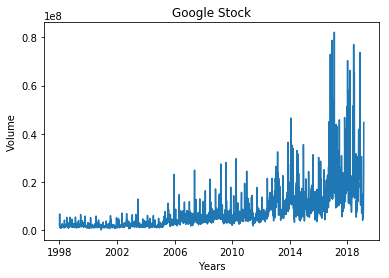

In [44]:
plt.plot(volume)

plt.xticks([tick*700 for tick in range(0,6)],[z for z in range(1998,2019,4)])

plt.title("Google Stock")

plt.xlabel('Years')
plt.ylabel('Volume')

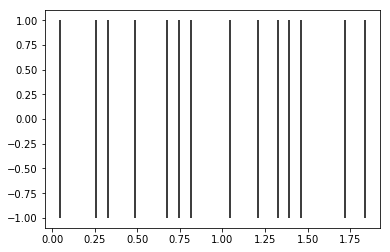

In [22]:
plt.vlines(onset_times, -1, 1, color='k')

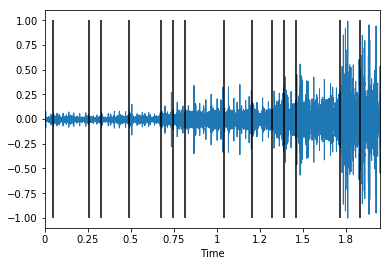

In [23]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

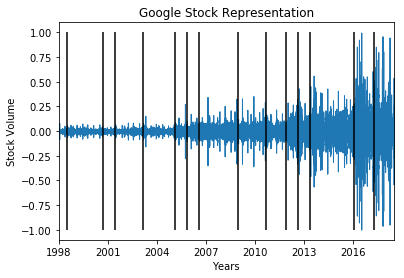

In [24]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.title("Google Stock Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume')

#plt.yticks(list(range(100, 0,-20)))

In [25]:
[z for z in range(1998,2019,3)]

[1998, 2001, 2004, 2007, 2010, 2013, 2016]

In [26]:
[tick*.0714 for tick in range(0,7)]

[0.0, 0.0714, 0.1428, 0.2142, 0.2856, 0.35700000000000004, 0.4284]

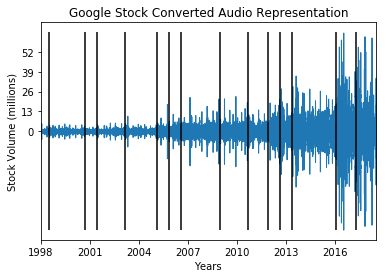

In [27]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

#plt.yticks(100, 1000, 500)

#plt.yticks(np.arange(0, 82, step=10))

plt.yticks([tick*.2 for tick in range(0,5)],[z for z in range(0,82,13)])

#max volume of 82,151,100

plt.title("Google Stock Converted Audio Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume (millions)')

#plt.yticks(list(range(100, 0,-20)))

